In [1]:
import networkx as nx
import numpy as np
from matplotlib import pyplot as plt
import pandas as pd
from numpy import linalg as LA
import sklearn as sk
from sklearn.model_selection import train_test_split
from sklearn.cluster import KMeans
from sklearn.metrics.cluster import normalized_mutual_info_score
import community.community_louvain as louvain
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC

In [ ]:
from google.colab import files
uploaded = files.upload()

TypeError: ignored

In [ ]:
# Read in the CSV file as a DataFrame
df = pd.read_csv('bilateral_trade_2016.csv')

# calculate the threshold for removing values
threshold = 1000000.0

# filter the DataFrame to exclude values below the threshold
df = df[df['tot_trade'] > threshold]

# Create a new Graph object
G = nx.Graph()

# Add the edges and edge weights from the DataFrame
for i, row in df.iterrows():
    G.add_edge(row['importer'], row['exporter'], weight=row['tot_trade'])

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


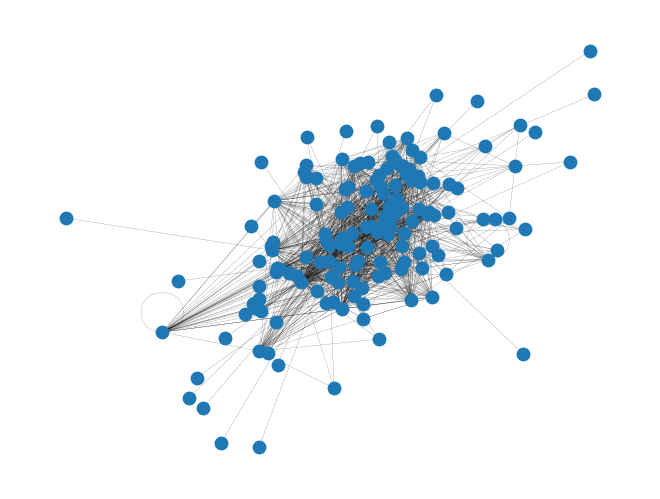

In [ ]:
pos = nx.spring_layout(G, seed=1)  # Seed for reproducible layout
nx.draw(G, pos=pos, node_size=80, width=.1)
plt.show()

In [ ]:
cluster_coefficient = nx.average_clustering(G)

In [ ]:
connectivity = nx.node_connectivity(G)

In [ ]:
b_centrality = nx.betweenness_centrality(G)

In [ ]:
print("Clustering Coefficient: ", str(cluster_coefficient))
print("Connectivity: ", str(connectivity))
print("Betweeness Centrality: ", str(b_centrality))


Clustering Coefficient:  0.6613352097438081
Connectivity:  1
Betweeness Centrality:  {'Other Asia, nes': 0.00338091282186695, 'Angola': 8.292088829001579e-05, 'United Arab Emirates': 0.025297537167059604, 'Australia': 0.0020217448453653773, 'Azerbaijan': 0.0, 'Brazil': 0.015829930695957076, 'Canada': 0.0018387599333323384, 'Switzerland': 0.020064708572343704, 'Chile': 0.005035735510046829, 'China': 0.3848156316013858, 'Germany': 0.06303545041472926, 'France': 0.014928268617928002, 'United Kingdom': 0.012280491171261615, 'China, Hong Kong SAR': 0.0035756247713906748, 'Indonesia': 0.0009465331999750808, 'India': 0.04147742367938931, 'Italy': 0.04506743285945454, 'Japan': 0.03888470935648068, 'Rep. of Korea': 0.029684304930819992, 'Kuwait': 0.0005945917116491846, 'Malaysia': 0.0006139851408130625, 'Netherlands': 0.03890400494211637, 'Oman': 0.0, 'Philippines': 0.00010979850079595509, 'Qatar': 3.653521819000656e-05, 'Russian Federation': 0.020809736109329378, 'Saudi Arabia': 0.002848599947

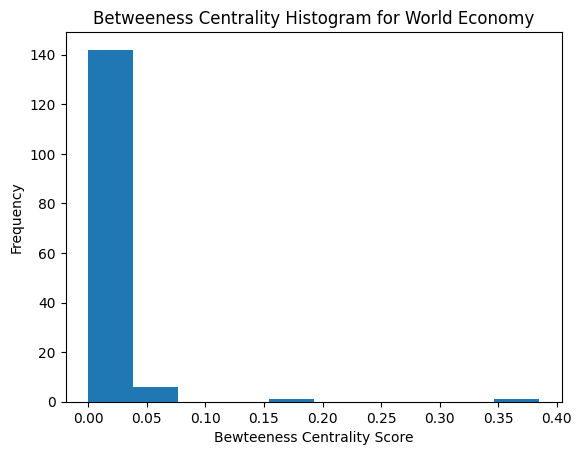

In [ ]:
# create a histogram
plt.hist(b_centrality.values())

# set the x-axis label
plt.xlabel('Bewteeness Centrality Score')

# set the y-axis label
plt.ylabel('Frequency')

# set the title
plt.title('Betweeness Centrality Histogram for World Economy')


# display the histogram
plt.show()

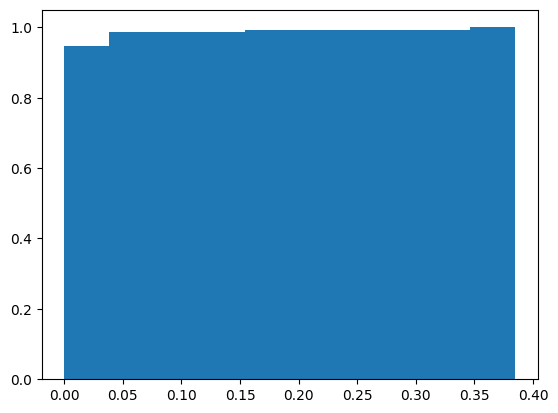

In [ ]:

plt.hist(b_centrality.values(), cumulative=True, density=True)
plt.show()

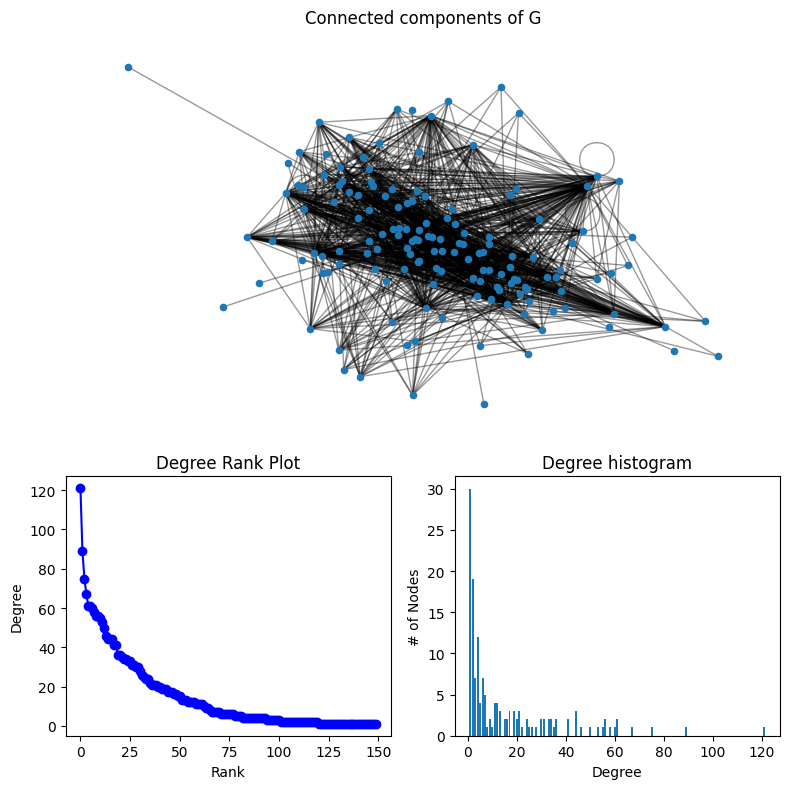

In [ ]:
degree_sequence = sorted([d for n, d in G.degree()], reverse=True)
dmax = max(degree_sequence)

fig = plt.figure("Degree of a random graph", figsize=(8, 8))
# Create a gridspec for adding subplots of different sizes
axgrid = fig.add_gridspec(5, 4)

ax0 = fig.add_subplot(axgrid[0:3, :])
Gcc = G.subgraph(sorted(nx.connected_components(G), key=len, reverse=True)[0])
pos = nx.spring_layout(Gcc, seed=10396953)
nx.draw_networkx_nodes(Gcc, pos, ax=ax0, node_size=20)
nx.draw_networkx_edges(Gcc, pos, ax=ax0, alpha=0.4)
ax0.set_title("Connected components of G")
ax0.set_axis_off()

ax1 = fig.add_subplot(axgrid[3:, :2])
ax1.plot(degree_sequence, "b-", marker="o")
ax1.set_title("Degree Rank Plot")
ax1.set_ylabel("Degree")
ax1.set_xlabel("Rank")

ax2 = fig.add_subplot(axgrid[3:, 2:])
ax2.bar(*np.unique(degree_sequence, return_counts=True))
ax2.set_title("Degree histogram")
ax2.set_xlabel("Degree")
ax2.set_ylabel("# of Nodes")

fig.tight_layout()
plt.show()

In [ ]:
import matplotlib.cm as cm
import community.community_louvain as louvain
import community

{'Other Asia, nes': 1, 'Angola': 1, 'United Arab Emirates': 1, 'Australia': 1, 'Azerbaijan': 2, 'Brazil': 1, 'Canada': 3, 'Switzerland': 2, 'Chile': 1, 'China': 1, 'Germany': 2, 'France': 2, 'United Kingdom': 2, 'China, Hong Kong SAR': 1, 'Indonesia': 1, 'India': 1, 'Italy': 2, 'Japan': 1, 'Rep. of Korea': 1, 'Kuwait': 1, 'Malaysia': 1, 'Netherlands': 2, 'Oman': 1, 'Philippines': 1, 'Qatar': 1, 'Russian Federation': 2, 'Saudi Arabia': 1, 'Singapore': 1, 'Thailand': 1, 'USA': 3, 'Viet Nam': 1, 'Afghanistan': 1, 'Iran': 1, 'Pakistan': 1, 'Portugal': 2, 'Albania': 2, 'Belgium': 2, 'Bahrain': 1, 'Botswana': 0, 'Egypt': 2, 'Spain': 2, 'Ghana': 1, 'Guinea': 1, 'Iraq': 1, 'Libya': 1, 'Mali': 1, 'Sudan': 1, 'Turkey': 2, 'Taiwan': 1, 'South Africa': 0, 'Argentina': 1, 'Mexico': 3, 'Austria': 2, 'Ireland': 3, 'New Zealand': 1, 'Papua New Guinea': 1, 'Sweden': 2, 'Czechia': 2, 'Hungary': 2, 'Poland': 2, 'Romania': 2, 'Slovakia': 2, 'Bangladesh': 1, 'Denmark': 2, 'Algeria': 2, 'Finland': 2, 'Israe

<ipython-input-17-ade7d86fd8ec>:9: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  cmap = cm.get_cmap('viridis', max(partition.values()) + 1)


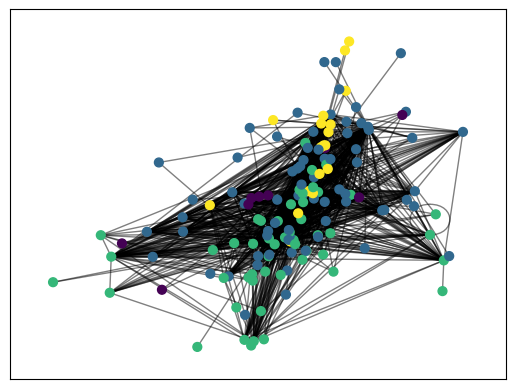

In [ ]:
#first compute the best partition
partition = louvain.best_partition(G)

print(partition)

# draw the graph
pos = nx.spring_layout(G)
# color the nodes according to their partition
cmap = cm.get_cmap('viridis', max(partition.values()) + 1)
nx.draw_networkx_nodes(G, pos, partition.keys(), node_size=40,
                       cmap=cmap, node_color=list(partition.values()))
nx.draw_networkx_edges(G, pos, alpha=0.5)
plt.show()